In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

data_modeling.h5 is the dataset merged and cleaned in the previous notebook.

In [28]:
store = pd.HDFStore('all_data.h5')
data = store['all_data']

In [29]:
data.head(5)

,unique_id,Orig_Date,loan_amount,monthly_payment,grade,income,inq_last_6m,num_open_accts,revol_bal,num_tot_accts,tot_credit_bal,accts_opn_last_6m,inq_last_12m,accts_opn_last_24m,employment_length,home_ownership,int_rate,earliest_cr_line,fico,util_rate,loan_over_income,term,dti,platform_id,orig_date,loan_status,report_date,mob,bom,ppmt,ipmt,co_amt,prepay_amt,eom,prepay,default
0,A-243811-1,APR2016,20000.0,470.15,C,75000.0,0.0,15.0,35435.0,25.0,42760.0,0.0,1.0,4.0,3,RENT,14.46,83.0,667.0,76.0,0.27,60,0.1864,A,NaN,current,JAN2020,45,6804.477673,388.156044,81.993956,0.0,0.0,6416.321629,0,0
1,A-89475-2,MAY2016,6025.0,200.09,C,70000.0,3.0,21.0,8640.0,42.0,100312.0,3.0,6.0,6.0,10,MORTGAGE/OWN,11.99,98.0,682.0,31.2,0.09,36,0.3005,A,NaN,paid_off,MAY2019,36,198.001430,198.001430,1.978364,0.0,0.0,0.000000,0,0
2,A-383194-3,APR2016,5450.0,173.72,B,70000.0,0.0,6.0,5746.0,24.0,119491.0,0.0,4.0,6.0,10,MORTGAGE/OWN,9.16,188.0,687.0,56.9,0.08,36,0.0811,A,NaN,paid_off,APR2019,36,173.563628,173.563628,1.632051,0.0,0.0,0.000000,0,0
3,A-97928-4,MAY2016,6725.0,246.48,D,55000.0,1.0,6.0,8551.0,12.0,287319.0,1.0,5.0,4.0,8,MORTGAGE/OWN,18.99,82.0,662.0,77.7,0.12,36,0.0805,A,NaN,paid_off,JUN2019,37,1.524140,1.524140,0.024120,0.0,0.0,0.000000,0,0
4,A-257581-5,JUN2016,24000.0,764.99,B,125000.0,0.0,22.0,33290.0,47.0,305776.0,0.0,0.0,3.0,5,MORTGAGE/OWN,9.16,84.0,682.0,80.2,0.19,36,0.1957,A,NaN,paid_off,JUN2019,36,758.868293,758.868293,5.792695,0.0,0.0,0.000000,0,0


Perform Treatment to the Orig_Date and Report_Date so that month and year is 

In [30]:

data['Orig_year'] = pd.DatetimeIndex(pd.to_datetime(data['Orig_Date'],format='%b%Y')).year
data['Orig_month'] = pd.DatetimeIndex(pd.to_datetime(data['Orig_Date'],format='%b%Y')).month

data['report_year'] = pd.DatetimeIndex(pd.to_datetime(data['report_date'],infer_datetime_format=True)).year
data['report_month'] = pd.DatetimeIndex(pd.to_datetime(data['report_date'],infer_datetime_format=True)).month

data.drop('Orig_Date', inplace=True, axis=1)
data.drop('report_date', inplace=True, axis=1)
data.drop('orig_date', inplace=True, axis=1)

Perform Treatment to the dti


In [31]:
data.loc[(data.platform_id == 'C'),'dti']=data['dti']-data['loan_over_income']
data['post_dti'] =  data['dti'] + data['loan_over_income']

In [32]:
data.head(5)

,unique_id,loan_amount,monthly_payment,grade,income,inq_last_6m,num_open_accts,revol_bal,num_tot_accts,tot_credit_bal,accts_opn_last_6m,inq_last_12m,accts_opn_last_24m,employment_length,home_ownership,int_rate,earliest_cr_line,fico,util_rate,loan_over_income,term,dti,platform_id,loan_status,mob,bom,ppmt,ipmt,co_amt,prepay_amt,eom,prepay,default,Orig_year,Orig_month,report_year,report_month,post_dti
0,A-243811-1,20000.0,470.15,C,75000.0,0.0,15.0,35435.0,25.0,42760.0,0.0,1.0,4.0,3,RENT,14.46,83.0,667.0,76.0,0.27,60,0.1864,A,current,45,6804.477673,388.156044,81.993956,0.0,0.0,6416.321629,0,0,2016.0,4.0,2020,1,0.4564
1,A-89475-2,6025.0,200.09,C,70000.0,3.0,21.0,8640.0,42.0,100312.0,3.0,6.0,6.0,10,MORTGAGE/OWN,11.99,98.0,682.0,31.2,0.09,36,0.3005,A,paid_off,36,198.001430,198.001430,1.978364,0.0,0.0,0.000000,0,0,2016.0,5.0,2019,5,0.3905
2,A-383194-3,5450.0,173.72,B,70000.0,0.0,6.0,5746.0,24.0,119491.0,0.0,4.0,6.0,10,MORTGAGE/OWN,9.16,188.0,687.0,56.9,0.08,36,0.0811,A,paid_off,36,173.563628,173.563628,1.632051,0.0,0.0,0.000000,0,0,2016.0,4.0,2019,4,0.1611
3,A-97928-4,6725.0,246.48,D,55000.0,1.0,6.0,8551.0,12.0,287319.0,1.0,5.0,4.0,8,MORTGAGE/OWN,18.99,82.0,662.0,77.7,0.12,36,0.0805,A,paid_off,37,1.524140,1.524140,0.024120,0.0,0.0,0.000000,0,0,2016.0,5.0,2019,6,0.2005
4,A-257581-5,24000.0,764.99,B,125000.0,0.0,22.0,33290.0,47.0,305776.0,0.0,0.0,3.0,5,MORTGAGE/OWN,9.16,84.0,682.0,80.2,0.19,36,0.1957,A,paid_off,36,758.868293,758.868293,5.792695,0.0,0.0,0.000000,0,0,2016.0,6.0,2019,6,0.3857


In [33]:
X = data.drop(['default', 'prepay','unique_id', 'loan_status','bom','eom','ppmt','ipmt','prepay_amt','co_amt'], axis=1)
y_default = data['default']
y_prepay = data['prepay']

In [34]:
X.head(5)

,loan_amount,monthly_payment,grade,income,inq_last_6m,num_open_accts,revol_bal,num_tot_accts,tot_credit_bal,accts_opn_last_6m,inq_last_12m,accts_opn_last_24m,employment_length,home_ownership,int_rate,earliest_cr_line,fico,util_rate,loan_over_income,term,dti,platform_id,mob,Orig_year,Orig_month,report_year,report_month,post_dti
0,20000.0,470.15,C,75000.0,0.0,15.0,35435.0,25.0,42760.0,0.0,1.0,4.0,3,RENT,14.46,83.0,667.0,76.0,0.27,60,0.1864,A,45,2016.0,4.0,2020,1,0.4564
1,6025.0,200.09,C,70000.0,3.0,21.0,8640.0,42.0,100312.0,3.0,6.0,6.0,10,MORTGAGE/OWN,11.99,98.0,682.0,31.2,0.09,36,0.3005,A,36,2016.0,5.0,2019,5,0.3905
2,5450.0,173.72,B,70000.0,0.0,6.0,5746.0,24.0,119491.0,0.0,4.0,6.0,10,MORTGAGE/OWN,9.16,188.0,687.0,56.9,0.08,36,0.0811,A,36,2016.0,4.0,2019,4,0.1611
3,6725.0,246.48,D,55000.0,1.0,6.0,8551.0,12.0,287319.0,1.0,5.0,4.0,8,MORTGAGE/OWN,18.99,82.0,662.0,77.7,0.12,36,0.0805,A,37,2016.0,5.0,2019,6,0.2005
4,24000.0,764.99,B,125000.0,0.0,22.0,33290.0,47.0,305776.0,0.0,0.0,3.0,5,MORTGAGE/OWN,9.16,84.0,682.0,80.2,0.19,36,0.1957,A,36,2016.0,6.0,2019,6,0.3857


In [35]:
encoder_1 = LabelEncoder()

# Fit the encoder on the data "platform_id"
encoder_1.fit(X["platform_id"])
X_platform_id_encoded = encoder_1.transform(X["platform_id"])
X["platform_id"] = X_platform_id_encoded

# Fit the encoder on the data "grade"
encoder_2 = LabelEncoder()
encoder_2.fit(X["grade"])
X_grade_encoded = encoder_2.transform(X["grade"])
X["grade"] = X_grade_encoded

# Fit the encoder on the data "home_ownership"
encoder_3 = LabelEncoder()
encoder_3.fit(X["home_ownership"])
X_home_ownership_encoded = encoder_3.transform(X["home_ownership"])
X["home_ownership"] = X_home_ownership_encoded

In [36]:
X.head(5)

,loan_amount,monthly_payment,grade,income,inq_last_6m,num_open_accts,revol_bal,num_tot_accts,tot_credit_bal,accts_opn_last_6m,inq_last_12m,accts_opn_last_24m,employment_length,home_ownership,int_rate,earliest_cr_line,fico,util_rate,loan_over_income,term,dti,platform_id,mob,Orig_year,Orig_month,report_year,report_month,post_dti
0,20000.0,470.15,3,75000.0,0.0,15.0,35435.0,25.0,42760.0,0.0,1.0,4.0,3,1,14.46,83.0,667.0,76.0,0.27,60,0.1864,0,45,2016.0,4.0,2020,1,0.4564
1,6025.0,200.09,3,70000.0,3.0,21.0,8640.0,42.0,100312.0,3.0,6.0,6.0,10,0,11.99,98.0,682.0,31.2,0.09,36,0.3005,0,36,2016.0,5.0,2019,5,0.3905
2,5450.0,173.72,2,70000.0,0.0,6.0,5746.0,24.0,119491.0,0.0,4.0,6.0,10,0,9.16,188.0,687.0,56.9,0.08,36,0.0811,0,36,2016.0,4.0,2019,4,0.1611
3,6725.0,246.48,4,55000.0,1.0,6.0,8551.0,12.0,287319.0,1.0,5.0,4.0,8,0,18.99,82.0,662.0,77.7,0.12,36,0.0805,0,37,2016.0,5.0,2019,6,0.2005
4,24000.0,764.99,2,125000.0,0.0,22.0,33290.0,47.0,305776.0,0.0,0.0,3.0,5,0,9.16,84.0,682.0,80.2,0.19,36,0.1957,0,36,2016.0,6.0,2019,6,0.3857


In [ ]:
from sklearn.cluster import KMeans

df = pd.DataFrame(training_data, columns=['inq_last_6m', 'inq_last_12m', 'accts_opn_last_6m', 'accts_opn_last_24m'])

kmeans = KMeans(n_clusters=4)

y = kmeans.fit_predict(df[['inq_last_6m', 'inq_last_12m', 'accts_opn_last_6m', 'accts_opn_last_24m']])

df['Cluster'] = y

1. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial.
2. Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.

LDA Regression

Eigenvalues:
[4.98878355e+00 3.22875497e+00 2.61514169e+00 2.02849942e+00
 1.51997480e+00 1.23337031e+00 1.11792880e+00 1.07032132e+00
 1.00454641e+00 9.99272922e-01 9.92207938e-01 9.58469773e-01
 9.25581051e-01 8.08854678e-01 6.79104602e-01 6.40451213e-01
 6.03792119e-01 5.09235967e-01 4.35228123e-01 4.24031693e-01
 3.15862306e-01 2.71614869e-01 2.44769429e-01 2.09751010e-01
 9.18647714e-02 6.87093307e-02 1.37550289e-02 1.68622572e-04]

Variances (Percentage):
[1.78170544e+01 1.15312485e+01 9.33977616e+00 7.24462870e+00
 5.42847238e+00 4.40488662e+00 3.99259620e+00 3.82256978e+00
 3.58765976e+00 3.56882591e+00 3.54359386e+00 3.42310062e+00
 3.30564109e+00 2.88876189e+00 2.42536953e+00 2.28732194e+00
 2.15639683e+00 1.81869685e+00 1.55438356e+00 1.51439638e+00
 1.12807778e+00 9.70051486e-01 8.74175074e-01 7.49109501e-01
 3.28087922e-01 2.45390057e-01 4.91250213e-02 6.02222466e-04]



Text(0, 0.5, 'Explained variance (%)')

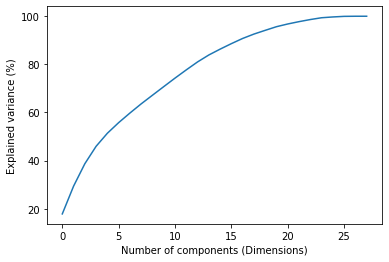

In [37]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X.fillna(0))

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

Logistic Regression

In [38]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X.fillna(0))

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= 10)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

          0         1         2         3         4         5         6  \
0  1.489088 -0.446708  0.822605  1.933586  0.701846  0.221648  0.687620   
1  2.873100  0.624812  1.236532 -2.210407 -0.803768  0.457832  0.135402   
2  1.557582 -1.155402  0.814512 -1.171495  0.671115 -0.849372  0.130170   
3  1.556693 -0.344046  2.419018  0.157003  0.158887 -1.091163  0.900239   
4  3.696679 -0.466613 -1.011351  1.406906  0.795518 -0.264346  0.262088   

          7         8         9  
0 -1.891173  0.910192 -0.086943  
1 -0.519625  1.227058 -0.067336  
2 -0.541806  0.790989  0.092976  
3 -0.191419  0.937760  0.103224  
4  0.504636  0.787497 -0.134828  

Size: 
(599303, 10)


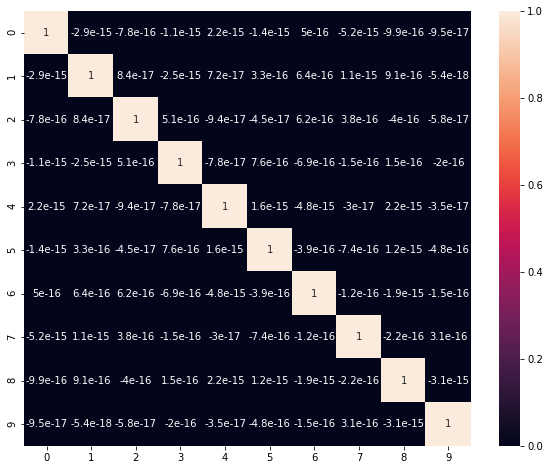

In [39]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True)

In [41]:
store = pd.HDFStore('X_pca.h5')
store['X_pca'] = X_pca  # save it

store = pd.HDFStore('y_default.h5')
store['y_default'] = y_default  # save it

store = pd.HDFStore('y_prepay.h5')
store['y_prepay'] = y_prepay  # save it


In [44]:
y_default.head(5)


0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50,random_state=0)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
feature_imp = pd.Series(model.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Iteration 1, loss = 0.34185301
Iteration 2, loss = 0.33446179
Iteration 3, loss = 0.33200340
Iteration 4, loss = 0.33000172
Iteration 5, loss = 0.32910675
Iteration 6, loss = 0.32840519
Iteration 7, loss = 0.32808464
Iteration 8, loss = 0.32757960
Iteration 9, loss = 0.32758940
Iteration 10, loss = 0.32727971
Iteration 11, loss = 0.32709648
Iteration 12, loss = 0.32690006
Iteration 13, loss = 0.32676268
Iteration 14, loss = 0.32690858
Iteration 15, loss = 0.32645623
Iteration 16, loss = 0.32627695
Iteration 17, loss = 0.32630681
Iteration 18, loss = 0.32592442
Iteration 19, loss = 0.32628293
Iteration 20, loss = 0.32592167


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.780


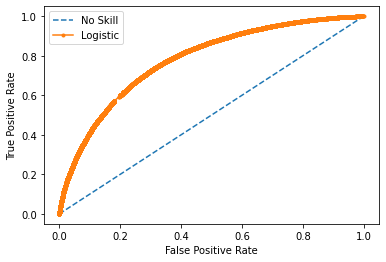

In [19]:
from sklearn.neural_network import MLPClassifier

time_start = time.time()
model = MLPClassifier(hidden_layer_sizes=(128, 32, 32, 128), max_iter=20, early_stopping=False, learning_rate_init=0.01, verbose=True)
model.fit(trainX, trainy)
time_end = time.time()

lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [25]:
print ("execution time:", time_end-time_start, "s")

execution time: 348.42587518692017 s
